<a href="https://colab.research.google.com/github/manuel103/linear-regression/blob/master/ML_Lab_1_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
m = 0
c = 0
L = 0.0001 # learning rate
epoch = 100
epoch_error_list = []
epoch_count_list = []

In [0]:
data = pd.read_csv('data.csv', header = 0)

In [0]:
X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N = float(len(X))

In [0]:
def mse(N, Y, Y_hat):
  return (1/N)* sum(Y-Y_hat)**2

In [0]:
def gradient_descent_fit(m,c,N,L):
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):
    Y_hat = m*X+c
    # compute error for every iteration
    epoch_count_list=epoch_count_list[:]# get list instance
    epoch_count_list.append(i)
    epoch_error=mse(N,Y,Y_hat)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)

    #minimize the error function by computing partial derivatives
    D_m=(-2/N)*sum(X*(Y-Y_hat))
    D_c=(-2/N)*sum(Y-Y_hat)

    m=m-(L * D_m)
    c=c-(L * D_c)

  print("final m is: ",m," and final c is: ",c)
  #return final predicted value of Y-dependent variable
  return Y_hat,epoch_count_list,epoch_error_list

final m is:  1.4788027175308887  and final c is:  0.03507497059521459


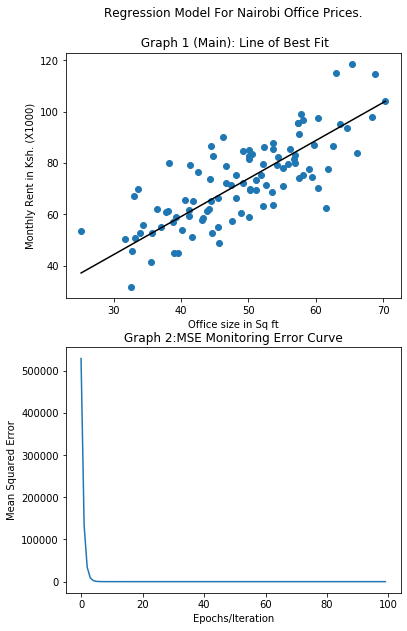

In [0]:
#call gradient descent fit function
returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

epoch_count_list.clear()
epoch_error_list.clear()

In [0]:
# Transform dataset to matrix

X = data.iloc[:, [0]].as_matrix()
y = data.iloc[:, 1].as_matrix()
print('X: ')
print(X)
print()
print('y: ')
print(y)

X: 
[[32.50234527]
 [53.42680403]
 [61.53035803]
 [47.47563963]
 [59.81320787]
 [55.14218841]
 [52.21179669]
 [39.29956669]
 [48.10504169]
 [52.55001444]
 [45.41973014]
 [54.35163488]
 [44.1640495 ]
 [58.16847072]
 [56.72720806]
 [48.95588857]
 [44.68719623]
 [60.29732685]
 [45.61864377]
 [38.81681754]
 [66.18981661]
 [65.41605175]
 [47.48120861]
 [41.57564262]
 [51.84518691]
 [59.37082201]
 [57.31000344]
 [63.61556125]
 [46.73761941]
 [50.55676015]
 [52.22399609]
 [35.56783005]
 [42.43647694]
 [58.16454011]
 [57.50444762]
 [45.44053073]
 [61.89622268]
 [33.09383174]
 [36.43600951]
 [37.67565486]
 [44.55560838]
 [43.31828263]
 [50.07314563]
 [43.87061265]
 [62.99748075]
 [32.66904376]
 [40.16689901]
 [53.57507753]
 [33.86421497]
 [64.70713867]
 [38.11982403]
 [44.50253806]
 [40.59953838]
 [41.72067636]
 [51.08863468]
 [55.0780959 ]
 [41.37772653]
 [62.49469743]
 [49.20388754]
 [41.10268519]
 [41.18201611]
 [50.18638949]
 [52.37844622]
 [50.13548549]
 [33.64470601]
 [39.55790122]
 [56.1

/home/emmanuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/emmanuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
'''
Applying a degree 12 polynomial transform to size_in_sq_ft:
'''
from sklearn.preprocessing import PolynomialFeatures

X_poly_8 = PolynomialFeatures(degree=8, include_bias=False).fit_transform(X)
print('First two rows of transformed X (size_in_sq_ft):\n')
print(X_poly_8[0:2])

First two rows of transformed X (size_in_sq_ft):

[[3.25023453e+01 1.05640245e+03 3.43355571e+04 1.11598613e+06
  3.62721666e+07 1.17893048e+09 3.83180056e+10 1.24542505e+12]
 [5.34268040e+01 2.85442339e+03 1.52502719e+05 8.14773288e+06
  4.35307328e+08 2.32570793e+10 1.24255142e+12 6.63855511e+13]]


In [0]:
'''
Specifying alpha values that scikit-learn will select from using cross-validation,
then use the RidgeCV classifier to fit the transformed data.
'''
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1.0, 10.0]

# Normalize is set to True to normalize data
clf = RidgeCV(alphas=alphas, normalize=True).fit(X_poly_8, y)

# Displaying the chosen alpha value:
clf.alpha_

0.1

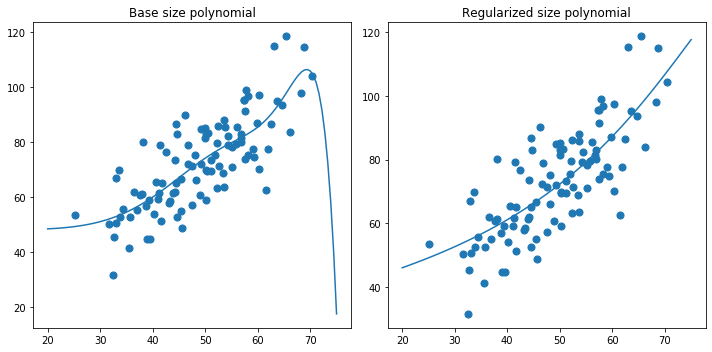

In [0]:
'''
Plotting the model predictions for the base degree 8 polynomial classifier 
next to the regularized size classifier:
'''

fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot_data()
plot_curve(curves[2])
plt.title('Base size polynomial')

plt.subplot(122)
plot_data()
plot_curve(ridge_curves[2])
plt.title('Regularized size polynomial')
plt.tight_layout()

In [0]:
from collections import namedtuple
'''
Creating curves used in the error prediction
'''
Curve = namedtuple('Curve', ['xs', 'ys'])
def make_curve(clf, x_start=20, x_end=75):
    xs = np.linspace(x_start, x_end, num=100)
    ys = clf.predict(xs.reshape(-1, 1))
    return Curve(xs, ys)

In [0]:
# Function to plot curves
def plot_curve(curve, ax=plt, **kwargs):
    ax.plot(curve.xs, curve.ys, **kwargs)

In [0]:
# Function to plot the scatter points
def plot_data(df=data, ax=plt, **kwargs):
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], s=50, **kwargs)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV


m = 2
c = 8
degrees = [m, c, 12]

# Using a pipeline as an estimator to fit & predict the score and as a classifier
clfs = [Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)),
                  ('reg', LinearRegression())])
        .fit(X, y)
        for deg in degrees]

curves = [make_curve(clf) for clf in clfs]

alphas = [0.01, 0.1, 1.0, 10.0]


/home/emmanuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/emmanuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/emmanuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# L1 (Lasso Regression)

/home/emmanuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/emmanuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/emmanuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


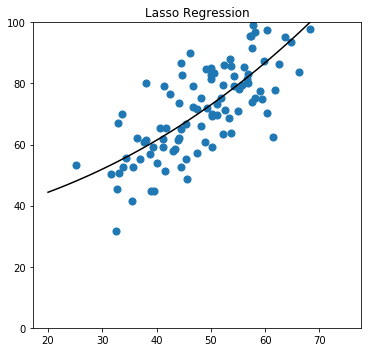

In [0]:
# Calculating the Lasso regression

lasso_clfs = [Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)),
                        ('reg', LassoCV(normalize=True, precompute=True, tol=0.001))])
        .fit(X, y)
        for deg in degrees]

# 2/N sum(y-y^)2 - @ sum(w)
'''
N = 
'''

lasso_curves = [make_curve(clf) for clf in lasso_clfs]

fig = plt.figure(figsize=(15, 5))
plt.subplot(133)
plot_data()
plot_curve(lasso_curves[2], color='black')
plt.title('Lasso Regression')
plt.ylim(0, 100)
plt.tight_layout()

Error encountered was underfitting

**How to avoid the error:**



1.   Incresing number of parameters in the model
2.   Adding more training samples
3.   Increasing the model complexity
4.   Increasing training time
5.   Decreasing the regularization parameter

**How to differentiate absolute functions**
 
 Example: derivative of |x|

-> f(x) = |x| = sqrt(x^2) = (x^2)*1/2

-> f'(x) = 1/2(x^2)^-1/2 * 2x = x/(x^2)^1/2

-> ...f'(x) = x/|x| when x = 0


# L2 (Ridge Regression)

(0, 100)

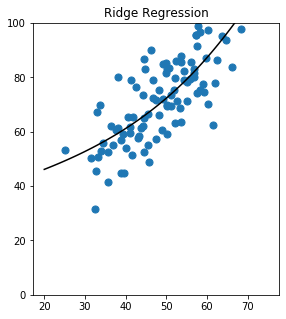

In [0]:
# Calculating the Ridge regression

ridge_clfs = [Pipeline([('poly', PolynomialFeatures(degree=deg, include_bias=False)),
                        ('reg', RidgeCV(alphas=alphas, normalize=True))])
        .fit(X, y)
        for deg in degrees]

ridge_curves = [make_curve(clf) for clf in ridge_clfs]

fig = plt.figure(figsize=(15, 5))

plt.subplot(132)
plot_data()
plot_curve(ridge_curves[2], color='black')
plt.title('Ridge Regression')
plt.ylim(0, 100)

L(θ^,X,y)=1n∑i(yi−fθ^(Xi))2+λ∑j=1pθj^2




# Comparing Ridge & Lasso Regression

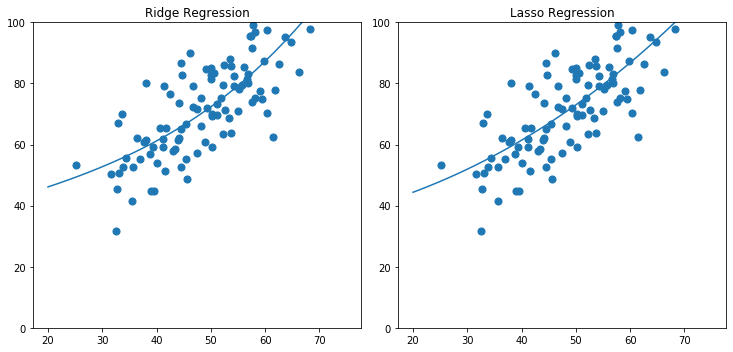

In [0]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(132)
plot_data()
plot_curve(ridge_curves[2])
plt.title('Ridge Regression')
plt.ylim(0, 100)

plt.subplot(133)
plot_data()
plot_curve(lasso_curves[2])
plt.title('Lasso Regression')
plt.ylim(0, 100)
plt.tight_layout()